**For tests**    
TAATG TCGCTG 2 -1 -1 0

In [1]:
from pprint import pprint

global MIN
MIN = -float("inf")

#return match or mismatch score
def _match(s, t, i, j, match, mismatch):
    if t[i-1] == s[j-1]:
        return match
    else:
        return mismatch

#initializers for matrices
def _init_x(i, j):
    if i > 0 and j == 0:
        return MIN
    else:
        if j > 0:
            return -10 + (-0.5 * j)
        else:
            return 0

def _init_y(i, j):
    if j > 0 and i == 0:
        return MIN
    else:
        if i > 0:
            return -10 + (-0.5 * i)
        else:
            return 0

def _init_m(i, j):
    if j == 0 and i == 0:
        return 0
    else:
        if j == 0 or i == 0:
            return MIN
        else:
            return 0

def _format_tuple(inlist, i, j):
    return 0

def distance_matrix(s, t, S, E, match, mismatch):
    dim_i = len(t) + 1
    dim_j = len(s) + 1
    #abuse list comprehensions to create matrices
    X = [[_init_x(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]
    Y = [[_init_y(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]
    M = [[_init_m(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]

    for j in range(1, dim_j):
        for i in range(1, dim_i):
            X[i][j] = max((S + E + M[i][j-1]), (E + X[i][j-1]), (S + E + Y[i][j-1]))
            Y[i][j] = max((S + E + M[i-1][j]), (S + E + X[i-1][j]), (E + Y[i-1][j]))
            M[i][j] = max(_match(s, t, i, j, match, mismatch) + M[i-1][j-1], X[i][j], Y[i][j])

    return [X, Y, M]

def backtrace(s, t, X, Y, M, match, mismatch):
    sequ1 = ''
    sequ2 = ''
    i = len(t)
    j = len(s)
    while (i>0 or j>0):
        if (i>0 and j>0 and M[i][j] == M[i-1][j-1] + _match(s, t, i, j, match, mismatch)):
            sequ1 += s[j-1]
            sequ2 += t[i-1]
            i -= 1; j -= 1
        elif (i>0 and M[i][j] == Y[i][j]):
            sequ1 += '_'
            sequ2 += t[i-1]
            i -= 1
        elif (j>0 and M[i][j] == X[i][j]):
            sequ1 += s[j-1]
            sequ2 += '_'
            j -= 1

    sequ1r = ''.join([sequ1[j] for j in range(-1, -(len(sequ1)+1), -1)])
    sequ2r = ''.join([sequ2[j] for j in range(-1, -(len(sequ2)+1), -1)])

    return [sequ1r, sequ2r]

In [2]:
l = input().split()
a = l[0]
b = l[1]
s1=list(a)
s2=list(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])
def answer(s1, s2, match, mismatch, open_gap, prolong_gap):
    X, Y, M = distance_matrix(s1, s2, open_gap, prolong_gap, match, mismatch)
    return backtrace(s1, s2, X, Y, M, match, mismatch), X, Y, M
answer = answer(s1, s2, match, mismatch, open_gap, prolong_gap)
print(*answer, sep = '\n\n')

 ATCCCGGGTT ATCCGGTT 1 -1 -1 0


['ATCCCGGGTT', 'AT_CC_GGTT']

[[0, -10.5, -11.0, -11.5, -12.0, -12.5, -13.0, -13.5, -14.0, -14.5, -15.0], [-inf, -11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-inf, -12.0, -1, 1, 1, 1, 1, 1, 1, 1, 1], [-inf, -12.5, -1, 0, 2, 2, 2, 2, 2, 2, 2], [-inf, -13.0, -1, 0, 1, 3, 3, 3, 3, 3, 3], [-inf, -13.5, -1, 0, 1, 2, 2, 3, 3, 3, 3], [-inf, -14.0, -1, 0, 1, 2, 2, 3, 4, 4, 4], [-inf, -14.5, -1, 0, 1, 2, 2, 2, 3, 3, 5], [-inf, -15.0, -1, 0, 1, 2, 2, 2, 3, 3, 4]]

[[0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf], [-10.5, -11.5, -12.0, -12.5, -13.0, -13.5, -14.0, -14.5, -15.0, -15.5, -16.0], [-11.0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-11.5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [-12.0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1], [-12.5, 0, 1, 2, 3, 2, 2, 2, 2, 2, 2], [-13.0, 0, 1, 2, 3, 2, 3, 3, 3, 2, 2], [-13.5, 0, 1, 2, 3, 2, 3, 4, 4, 3, 3], [-14.0, 0, 1, 2, 3, 2, 3, 4, 4, 5, 4]]

[[0, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf], [-inf, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-inf, 0, 2, 1, 1,

# Для теста
 ATCCCGGGTT ATCCGGTT 1 -1 -1 0

In [13]:
backtrace('TAATG', 'TCGCTG', X, Y, M)

['T A A _ T G', 'T C G C T G']

In [7]:
print(X)
print(Y)
print(M)

[[0, -10.5, -11.0, -11.5, -12.0, -12.5], [-inf, -11.5, 1.0, 1.0, 1.0, 1.0], [-inf, -12.0, 0.0, 0.0, 0.0, 0.0], [-inf, -12.5, 0.0, 0.0, 0.0, 0.0], [-inf, -13.0, 0.0, 0.0, 0.0, 0.0], [-inf, -13.5, 0.0, 0.0, 0.0, 1.0], [-inf, -14.0, 0.0, 0.0, 0.0, 0.0]]
[[0, -inf, -inf, -inf, -inf, -inf], [-10.5, -11.5, -12.0, -12.5, -13.0, -13.5], [-11.0, 1.0, 0.0, 0.0, 0.0, 0.0], [-11.5, 1.0, 0.0, 0.0, 0.0, 0.0], [-12.0, 1.0, 0.0, 0.0, 0.0, 1.0], [-12.5, 1.0, 0.0, 0.0, 0.0, 1.0], [-13.0, 1.0, 0.0, 0.0, 1.0, 1.0]]
[[0, -inf, -inf, -inf, -inf, -inf], [-inf, 2.0, 1.0, 1.0, 1.0, 1.0], [-inf, 1.0, 1.0, 0.0, 0.0, 0.0], [-inf, 1.0, 0.0, 0.0, 0.0, 2.0], [-inf, 1.0, 0.0, 0.0, 0.0, 1.0], [-inf, 1.0, 0.0, 0.0, 2.0, 1.0], [-inf, 1.0, 0.0, 0.0, 1.0, 4.0]]


In [161]:
l = input().split()
a = l[0]
b = l[1]
s1=list(a)
s2=list(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])

def matrix(s1, s2, match, mismatch, open_gap, prolong_gap):
    n=len(s1)
    m=len(s2)

    if open_gap>0:
        multi = -10000000
    else:
        multi = 10000000  
    # for mid table 
    
    mid = [[0 for x in range(m+1)] for x in range(n+1)]
    mid[0][0] = 0
    mid[0][1] = open_gap*multi
    mid[1][0] = open_gap*multi
    
    for i in range(2, len(mid)):
        #mid[i][0] = mid [i-1][0] - prolong_gap
        mid[i][0] = open_gap*multi
    for j in range (2, len(mid[0])):
        #mid[0][j] = mid[0][j-1] - prolong_gap
        mid[0][j] = open_gap*multi
    
    
    
   # for upper table
    upper = [[0 for x in range(m+1)] for x in range(n+1)]
    
    for i in range(len(mid)):
        upper[i][0] = n*open_gap*multi
    upper[0][1] = open_gap
    for i in range(2, len(upper[0])):
        upper[0][i] = upper[0][i-1] + prolong_gap
    upper[0][0] = 0
   
   # for lower table
    lower = [[0 for x in range(m+1)] for x in range(n+1)]
    for i in range(len(mid[0])):
        lower[0][i] = n*open_gap*multi
    lower[1][0] = open_gap
    for i in range(2, len(mid)):
        lower[i][0] = lower[i-1][0] + prolong_gap
    lower[0][0] = 0
    
    # create a backtrack table
    
    back = [[0 for x in range(m+1)] for x in range(n+1)]
    for i in range(len(back[0])):
        back[0][i] = 'e'
    for i in range(len(back)):
        back[i][0] = 's'
    back[0][0] = '*'
   
    # fill gap alignmnet tables
    maxscore = 0 
    for i in range(1, len(mid)):
        for j in range(1, len(mid[i])):
            
            if s2[j-1] == s1[i-1]:
                w1 = match
                
            elif s2[j-1] != s1[i-1]:
                w1 = mismatch 
            
            
            
           

            upper[i][j] = max(lower[i][j-1] + prolong_gap + open_gap, mid[i][j-1] + open_gap + prolong_gap, upper[i][j-1] + prolong_gap)
            lower[i][j] = max(lower[i-1][j] + prolong_gap, mid[i-1][j] + open_gap + prolong_gap, upper[i-1][j] + prolong_gap + open_gap)
            mid[i][j] = max(mid[i-1][j-1]+w1, lower[i-1][j-1] + w1, upper[i-1][j-1] + w1)


            
            decision = max(mid[i][j], lower[i][j], upper[i][j])
            if decision == mid[i][j]:
                back[i][j] = 'd'
            elif decision == lower[i][j]:
                back[i][j] = 'e'
            elif decision == upper[i][j]:
                back[i][j] = 's'
            
            if decision>maxscore:
                maxscore = decision
                
    a1 = ''
    a2 = ''
    i = n
    j = m
    
    while i>0 or j>0:
        if back[i][j] == 'd':
            a1 = s1[i-1] + a1
            a2 = s2[j-1] + a2
            i = i-1
            j = j-1
        elif back[i][j] == 'e':
            a1 = '_' + a1
            a2 = s2[j-1] + a2
            j = j-1
        elif back[i][j] == 's':
            a1 = s1[i-1] + a1
            a2 = '_' + a2
            i = i-1
       

    return maxscore, a1, a2, lower, mid, upper

answer=matrix(s1, s2, match, mismatch, open_gap, prolong_gap)

'''
for i in answer:
    print (''.join(i), end = '\n\n')
    '''
print(*answer, sep = '\n\n')


 TGTTTATG CCGTAGTTGT 2 -2 -1 1


15

TGTT___TA__TG_

____CCGTAGTTGT

[[0, -80000000, -80000000, -80000000, -80000000, -80000000, -80000000, -80000000, -80000000, -80000000, -80000000], [-1, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

[[0, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000], [-10000000, -2, -3, -2, 3, 0, 1, 6, 7, 4, 9], [-10000000, -3, -3, 2, -1, 1, 5, 2, 4, 9, 5], [-10000000, -2, -2, -1, 4, 1, 2, 7, 8, 5, 11], [-10000000, -1, -1, 0, 5, 2, 3, 8, 9, 6, 11], [-10000000, 0, 0, 1, 6, 3, 4, 9, 10, 7, 12], [-10000000, 1, 1, 2, 3, 8, 5, 6, 7, 8, 9], [-10000000, 2, 2, 3, 8, 5, 6, 11, 12, 9, 14], [-10000000, 3, 3, 8, 5, 6, 11, 8, 9, 14, 11]]

[[0, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [-80000000, -1, 0, 1, 2, 

In [ ]:
TAATG TCGCTG 2 -1 -1 0

In [39]:
l = input().split()
a = l[0]
b = l[1]
s1=list(a)
s2=list(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])


def alignment(s1, s2, match, mismatch, open_gap, prolong_gap):
        n=len(s1)
        m=len(s2)
        
        multi = - 10000000
            
        main = [[0 for x in range(n+1)] for x in range(m+1)]
        lower = [[0 for x in range(n+1)] for x in range(m+1)]
        upper = [[0 for x in range(n+1)] for x in range(m+1)]
        
        
        for i in range(n+1):
            main[0][i] = multi
            upper[0][i] = multi
            lower[0][i] = open_gap + prolong_gap*i
        for i in range(m+1):
            main[i][0] = multi
            lower[i][0] = multi
            upper[i][0] = open_gap + prolong_gap*i
            
        main[0][0] = 0   
        lower[0][0] = 0
        upper[0][0] = 0
        
        back = [[0 for x in range(n+1)] for x in range(m+1)]
        for i in range(m+1):
            back[i][0] = 'd'
        for j in range(n+1):
            back[0][j] = 's'
        back[0][0] = '*'
   
        
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')
        print(*back, sep = '\n')
        
        for i in range(1, m+1):
            for j in range(1, n+1):
                
                upper[i][j] = max(upper[i-1][j] + prolong_gap, main[i-1][j] + prolong_gap + open_gap,lower[i-1][j] + prolong_gap + open_gap)
                lower[i][j] = max(lower[i][j-1] + prolong_gap, main[i][j-1] + prolong_gap + open_gap, upper[i][j-1] + prolong_gap + open_gap)
                
                if s1[j-1] == s2[i-1]:
                    r = match
                else:
                    r = mismatch
                    
                main[i][j] = max(main[i-1][j-1] + r, upper[i-1][j-1] + r, lower[i-1][j-1] + r)
                
                des  = max(main[i][j], lower[i][j], upper[i][j])
                if des == main[i][j]:
                    back[i][j] = 'e'
                elif des == lower[i][j]:
                    back[i][j] = 'd'
                elif des == upper[i][j]:
                    back[i][j] = 's'        
       
                
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')        
        print(*back, sep = '\n')       

        a1 = ''
        a2 = ''
        
        
        k, v = m, n
        while v>0 or k>0:
            if back[k][v] == 'e':
                a1 = s1[v-1] + a1
                a2 = s2[k-1] + a2
                v = v-1
                k = k-1
            elif back[k][v] == 'd':
                a1 = '_' + a1
                a2 = s2[k-1] + a2
                k = k-1
            elif back[k][v] == 's':
                a1 = s1[v-1] + a1
                a2 = '_' + a2
                v = v-1
        return a1, a2
        
    
    
    
answer=alignment(s1, s2, match, mismatch, open_gap, prolong_gap)

print(*answer, sep = '\n\n')

 TAATG TCGCTG 2 -1 -1 0


[0, -10000000, -10000000, -10000000, -10000000, -10000000]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[0, -1, -1, -1, -1, -1]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0]
[0, -10000000, -10000000, -10000000, -10000000, -10000000]
[-1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0]
['*', 's', 's', 's', 's', 's']
['d', 0, 0, 0, 0, 0]
['d', 0, 0, 0, 0, 0]
['d', 0, 0, 0, 0, 0]
['d', 0, 0, 0, 0, 0]
['d', 0, 0, 0, 0, 0]
['d', 0, 0, 0, 0, 0]
[0, -10000000, -10000000, -10000000, -10000000, -10000000]
[-10000000, 2, -2, -2, 1, -2]
[-10000000, -2, 1, 0, 0, 0]
[-10000000, -2, 0, 0, -1, 2]
[-10000000, -2, 0, -1, -1, -1]
[-10000000, 1, 0, -1, 2, -1]
[-10000000, -2, 0, -1, -1, 4]
[0, -1, -1, -1, -1, -

# Properly!

In [25]:
l = input().split()
a = l[0]
b = l[1]
s1=list(a)
s2=list(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])


def alignment(s1, s2, match, mismatch, open_gap, prolong_gap):
        n=len(s1)
        m=len(s2)
        score = 0
        multi = - 10000000
            
        main = [[0 for x in range(n+1)] for x in range(m+1)]
        lower = [[0 for x in range(n+1)] for x in range(m+1)]
        upper = [[0 for x in range(n+1)] for x in range(m+1)]
        
        
        for i in range(n+1):
            main[0][i] = multi
            upper[0][i] = multi
            lower[0][i] = open_gap + prolong_gap*i
        for i in range(m+1):
            main[i][0] = multi
            lower[i][0] = multi
            upper[i][0] = open_gap + prolong_gap*i
            
        main[0][0] = 0   
        lower[0][0] = 0
        upper[0][0] = 0
        
        back = [[0 for x in range(n+1)] for x in range(m+1)]
        for i in range(m+1):
            back[i][0] = 'from_s2'
        for j in range(n+1):
            back[0][j] = 'from_s1'
        back[0][0] = '*'
   
        '''
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')
        print(*back, sep = '\n')
        '''
        
        
        
        for i in range(1, m+1):
            for j in range(1, n+1):
                
                upper[i][j] = max(upper[i-1][j] + prolong_gap, main[i-1][j] + prolong_gap + open_gap,lower[i-1][j] + prolong_gap + open_gap)
                lower[i][j] = max(lower[i][j-1] + prolong_gap, main[i][j-1] + prolong_gap + open_gap, upper[i][j-1] + prolong_gap + open_gap)
                
                if s1[j-1] == s2[i-1]:
                    r = match
                else:
                    r = mismatch
                    
                main[i][j] = max(main[i-1][j-1] + r, upper[i-1][j-1] + r, lower[i-1][j-1] + r)
                
                
                des  = max(main[i][j], upper[i][j] , lower[i][j])
                
                if des == main[i][j]:
                    back[i][j] = 'from_main'
                elif des == upper[i][j]:
                    back[i][j] = 'from_s2'
                elif des == lower[i][j]:
                    back[i][j] = 'from_s1'        
                score = max(score, des)
        '''        
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')        
        print(*back, sep = '\n')
        '''

        a1 = ''
        a2 = ''
        
        k = m
        v = n
        '''
        print(k, v)
        print(len(s2), len(s1))
        '''
        while v>0 or k>0:
            if back[k][v] == 'from_main':
                a1 = s1[v-1] + a1
                a2 = s2[k-1] + a2
                v = v-1
                k = k-1
            elif back[k][v] == 'from_s1':
                a1 = s1[v-1] + a1
                a2 = '_' + a2 
        
                v = v-1
            elif back[k][v] == 'from_s2':
                a1 = '_' + a1
                a2 = s2[k-1] + a2
                
                k = k-1
        return score, a1, a2
    
    
    
answer=alignment(s1, s2, match, mismatch, open_gap, prolong_gap)

print(*answer, sep = ' ')

 TGTTTATG CCGTAGTTGT 2 -2 -1 1


16 TGTT___TA__TG_ ____CCGTAGTTGT


In [ ]:
TAATG TCGCTG 2 -1 -1 0

# Better!

In [ ]:
l = input().split()
a = l[0]
b = l[1]
s1=list(a)
s2=list(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])


def alignment(s1, s2, match, mismatch, open_gap, prolong_gap):
        n=len(s1)
        m=len(s2)
        score = 0
        multi = - 10000000
            
        main = [[0 for x in range(n+1)] for x in range(m+1)]
        lower = [[0 for x in range(n+1)] for x in range(m+1)]
        upper = [[0 for x in range(n+1)] for x in range(m+1)]
        
        
        for i in range(n+1):
            main[0][i] = multi
            upper[0][i] = multi
            lower[0][i] = open_gap + prolong_gap*i
        for i in range(m+1):
            main[i][0] = multi
            lower[i][0] = multi
            upper[i][0] = open_gap + prolong_gap*i
            
        main[0][0] = 0   
        lower[0][0] = 0
        upper[0][0] = 0
        
        back = [[0 for x in range(n+1)] for x in range(m+1)]
        for i in range(m+1):
            back[i][0] = 'from_s2'
        for j in range(n+1):
            back[0][j] = 'from_s1'
        back[0][0] = '*'
   
        '''
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')
        print(*back, sep = '\n')
        '''
        
        
        
        for i in range(1, m+1):
            for j in range(1, n+1):
                
                upper[i][j] = max(upper[i-1][j] + prolong_gap, main[i-1][j] + prolong_gap + open_gap,lower[i-1][j] + prolong_gap + open_gap)
                lower[i][j] = max(lower[i][j-1] + prolong_gap, main[i][j-1] + prolong_gap + open_gap, upper[i][j-1] + prolong_gap + open_gap)
                
                if s1[j-1] == s2[i-1]:
                    r = match
                else:
                    r = mismatch
                    
                main[i][j] = max(main[i-1][j-1] + r, upper[i-1][j-1] + r, lower[i-1][j-1] + r)
                
                
                des  = max(main[i][j], upper[i][j] , lower[i][j])
                
                if des == main[i][j]:
                    back[i][j] = 'from_main'
                elif des == upper[i][j]:
                    back[i][j] = 'from_s2'
                elif des == lower[i][j]:
                    back[i][j] = 'from_s1'        
                
        '''        
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')        
        print(*back, sep = '\n')
        '''

        a1 = ''
        a2 = ''
        
        k = m
        v = n
        '''
        print(k, v)
        print(len(s2), len(s1))
        '''
        
        score = max(main[k][v], lower[k][v], upper[k][v])
        while v>0 or k>0:
            if back[k][v] == 'from_main':
                a1 = s1[v-1] + a1
                a2 = s2[k-1] + a2
                v = v-1
                k = k-1
            elif back[k][v] == 'from_s1':
                a1 = s1[v-1] + a1
                a2 = '_' + a2 
        
                v = v-1
            elif back[k][v] == 'from_s2':
                a1 = '_' + a1
                a2 = s2[k-1] + a2
                
                k = k-1
        return score, a1, a2
    
    
    
answer=alignment(s1, s2, match, mismatch, open_gap, prolong_gap)

print(*answer, sep = ' ')




In [53]:
l = input().split()
a = l[0]
b = l[1]
s1=str(a)
s2=str(b)

match = int(l[2])
mismatch = int(l[3])
open_gap = int(l[4])
prolong_gap = int(l[5])
def score(string1, string2, match, mismatch, open_gap, prolong_gap):
    score = 0
    gap = False
    
    for i in range(0, len(string1)):
        if (string1[i]=='_' or string2[i] == '_') and gap == False:
            gap = True
            score = score + open_gap + prolong_gap
        elif (string1[i]=='_' or string2[i] == '_') and gap == True:
            score = score + prolong_gap
        elif string1[i] != string2[i]:
            gap = False
            score = score + mismatch
        elif string1[i] == string2[i]:
            gap = False
            score = score + match
    return score

def alignment(s1, s2, match, mismatch, open_gap, prolong_gap):
        n=len(s1)
        m=len(s2)
        
        multi = - 10000000
            
        main = [[0 for x in range(n+1)] for x in range(m+1)]
        lower = [[0 for x in range(n+1)] for x in range(m+1)]
        upper = [[0 for x in range(n+1)] for x in range(m+1)]
        
        
        for i in range(n+1):
            main[0][i] = multi
            upper[0][i] = multi
            lower[0][i] = open_gap + prolong_gap*i
        for i in range(m+1):
            main[i][0] = multi
            lower[i][0] = multi
            upper[i][0] = open_gap + prolong_gap*i
            
        main[0][0] = 0   
        lower[0][0] = 0
        upper[0][0] = 0
        

        
        back = [[0 for x in range(n+1)] for x in range(m+1)]
        for i in range(m+1):
            back[i][0] = 'from_s2'
        for j in range(n+1):
            back[0][j] = 'from_s1'
        back[0][0] = '*'
   
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')        
        print(*back, sep = '\n')
        
        
        for i in range(1, m+1):
            for j in range(1, n+1):
                
                upper[i][j] = max(upper[i-1][j] + prolong_gap, main[i-1][j] + prolong_gap + open_gap,lower[i-1][j] + prolong_gap + open_gap)
                lower[i][j] = max(lower[i][j-1] + prolong_gap, main[i][j-1] + prolong_gap + open_gap, upper[i][j-1] + prolong_gap + open_gap)
                
                if s1[j-1] == s2[i-1]:
                    r = match
                else:
                    r = mismatch
                    
                main[i][j] = max(main[i-1][j-1] + r, upper[i-1][j-1] + r, lower[i-1][j-1] + r)
                
                
                des  = max(main[i][j], upper[i][j], lower[i][j])
                
                if des == main[i][j]:
                    back[i][j] = 'from_main'
                elif des == upper[i][j]:
                    back[i][j] = 'from_s2'
                elif des == lower[i][j]:
                    back[i][j] = 'from_s1'        
                
        print(*main, sep = '\n')
        print(*lower, sep = '\n')
        print(*upper, sep = '\n')        
        print(*back, sep = '\n')

        a1 = ''
        a2 = ''
        
        k = m
        v = n
        
        print(k, v)
        
        
        while v>0 or k>0:
            if back[k][v] == 'from_main':
                a1 = s1[v-1] + a1
                a2 = s2[k-1] + a2
                v = v-1
                k = k-1
            elif back[k][v] == 'from_s2':
                a1 = '_' + a1
                a2 = s2[k-1] + a2
                k = k-1
            elif back[k][v] == 'from_s1':
                a1 = s1[v-1] + a1
                a2 = '_' + a2 
                v = v-1
        
        score_value = score(a1, a2, match, mismatch, open_gap, prolong_gap)
        return score_value, a1, a2
    
    
    
answer=alignment(s1, s2, match, mismatch, open_gap, prolong_gap)

print(*answer, sep = ' ')








 ATCCCGGGTT ATCCGGTT 1 -1 -1 0


[0, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-10000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000, -10000000]
[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1, 0, 0, 0, 0, 0, 0

In [49]:
def score(string1, string2, match, mismatch, open_gap, prolong_gap):
    score = 0
    gap = False
    
    for i in range(0, len(string1)):
        if (string1[i]=='_' or string2[i] == '_') and gap == False:
            gap = True
            score = score + open_gap + prolong_gap
        elif (string1[i]=='_' or string2[i] == '_') and gap == True:
            score = score + prolong_gap
        elif string1[i] != string2[i]:
            gap = False
            score = score + mismatch
        elif string1[i] == string2[i]:
            gap = False
            score = score + match
    return score
        

In [50]:
score('ATCCCGGGTT', 'AT_CC_GGTT', 1, -1, -1, 0)

6

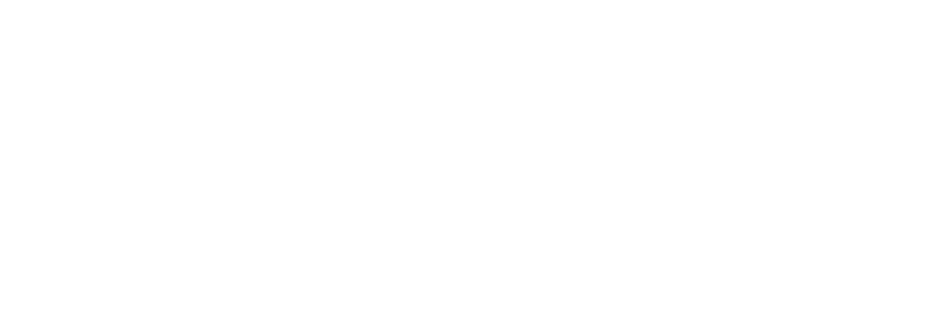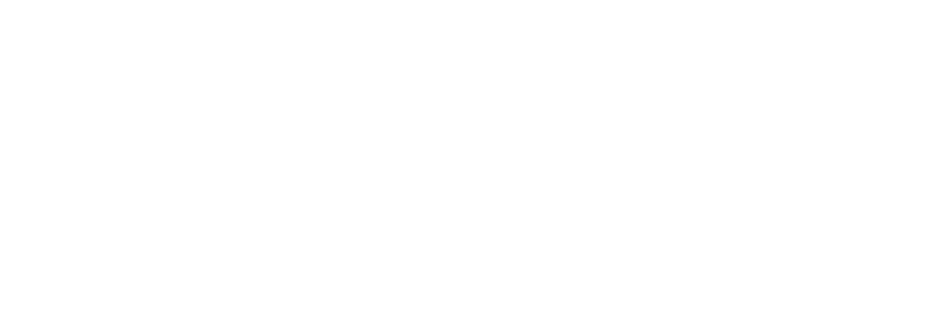